In [4]:
# Import some necessary librairies
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
import pickle
from scipy import stats
from subprocess import check_output
color = sns.color_palette()
sns.set_style('darkgrid')

# To ignore the warning messages
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting float output to 3 decimal points

In [5]:
train = pd.read_csv('./iith_foml_2023_train.csv') # Reading the training csv file
test = pd.read_csv('./iith_foml_2023_train.csv')   # Reading the testing csv file

In [6]:
train.head(5) 

Feature 1 (Discrete)  Feature 2 (Discrete)  Feature 3 (Discrete)  \
0                  1404                    12                    64   
1                   909                     0                   235   
2                   654                     3                   175   
3                  1372                    12                   382   
4                   786                     3                   199   

   Feature 4 (Discrete)  Feature 5 (Discrete)  Feature 6 (Discrete)  \
0                    14                     3                     1   
1                    32                     1                     1   
2                     2                     1                     1   
3                    14                     2                     0   
4                     2                     1                     0   

   Feature 7 (Discrete)  Feature 8 (Discrete)  Feature 9  Feature 10  ...  \
0                     1                     1    110.502   35775.200  ...   
1                     1                     1    -40.448   35779.400  ...   
2                     1                     1    -27.445   35770.400  ...   
3                     1                     0      0.001     509.200  ...   
4                     1                     0      0.001     612.100  ...   

   Feature 16  Feature 17  Feature 18  Feature 19 (Discrete)  \
0         NaN         NaN      15.040                    104   
1    2200.300    4900.005      12.030                     20   
2    1973.300   10000.004      13.010                      1   
3         NaN         NaN         NaN                    313   
4         NaN         NaN         NaN                    171   

   Feature 20 (Discrete)  Feature 21 (Discrete)  Feature 22 (Discrete)  \
0                     12                      2                     32   
1                      1                      0                     13   
2                      1                      0                     13   
3                     12                     10                     54   
4                      1                      5                     11   

   Feature 23 (Discrete)  Feature 24  Target Variable (Discrete)  
0                   1409   37677.100                           1  
1                    909   25239.100                           1  
2                    654   27683.500                           1  
3                   1377   39363.200                           0  
4                    786   40044.400                           2  

[5 rows x 25 columns]

In [7]:
test.head(5)

Feature 1 (Discrete)  Feature 2 (Discrete)  Feature 3 (Discrete)  \
0                  1404                    12                    64   
1                   909                     0                   235   
2                   654                     3                   175   
3                  1372                    12                   382   
4                   786                     3                   199   

   Feature 4 (Discrete)  Feature 5 (Discrete)  Feature 6 (Discrete)  \
0                    14                     3                     1   
1                    32                     1                     1   
2                     2                     1                     1   
3                    14                     2                     0   
4                     2                     1                     0   

   Feature 7 (Discrete)  Feature 8 (Discrete)  Feature 9  Feature 10  ...  \
0                     1                     1    110.502   35775.200  ...   
1                     1                     1    -40.448   35779.400  ...   
2                     1                     1    -27.445   35770.400  ...   
3                     1                     0      0.001     509.200  ...   
4                     1                     0      0.001     612.100  ...   

   Feature 16  Feature 17  Feature 18  Feature 19 (Discrete)  \
0         NaN         NaN      15.040                    104   
1    2200.300    4900.005      12.030                     20   
2    1973.300   10000.004      13.010                      1   
3         NaN         NaN         NaN                    313   
4         NaN         NaN         NaN                    171   

   Feature 20 (Discrete)  Feature 21 (Discrete)  Feature 22 (Discrete)  \
0                     12                      2                     32   
1                      1                      0                     13   
2                      1                      0                     13   
3                     12                     10                     54   
4                      1                      5                     11   

   Feature 23 (Discrete)  Feature 24  Target Variable (Discrete)  
0                   1409   37677.100                           1  
1                    909   25239.100                           1  
2                    654   27683.500                           1  
3                   1377   39363.200                           0  
4                    786   40044.400                           2  

[5 rows x 25 columns]

In [8]:
ntrain = train.shape[0]        # Number of samples in train
ntest = test.shape[0]          # Number of samples in test
y_train = train['Target Variable (Discrete)'].values    # Setting up y_train
all_data = pd.concat((train, test)).reset_index(drop=True)          # Concatenating train and test into all_data
all_data.drop(['Target Variable (Discrete)'], axis=1, inplace=True) # Dropping the Target Variable column
print("all_data size is : {}".format(all_data.shape))               # Printing the overall shape

all_data size is : (1988, 24)


In [9]:
print(all_data.dtypes) 

Feature 1 (Discrete)       int64
Feature 2 (Discrete)       int64
Feature 3 (Discrete)       int64
Feature 4 (Discrete)       int64
Feature 5 (Discrete)       int64
Feature 6 (Discrete)       int64
Feature 7 (Discrete)       int64
Feature 8 (Discrete)       int64
Feature 9                float64
Feature 10               float64
Feature 11               float64
Feature 12               float64
Feature 13               float64
Feature 14               float64
Feature 15               float64
Feature 16               float64
Feature 17               float64
Feature 18               float64
Feature 19 (Discrete)      int64
Feature 20 (Discrete)      int64
Feature 21 (Discrete)      int64
Feature 22 (Discrete)      int64
Feature 23 (Discrete)      int64
Feature 24               float64
dtype: object


1     488
0     249
2     109
6      70
5      41
8       7
14      5
7       5
15      4
4       3
13      3
3       3
9       2
12      1
17      1
11      1
10      1
16      1
Name: Target Variable (Discrete), dtype: int64


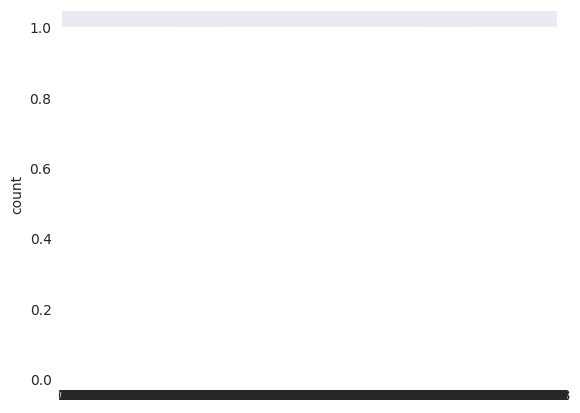

In [10]:
# Analysing the values present in target values
targets = train['Target Variable (Discrete)'].value_counts()  # Using value_counts to get the counts of each values
print(targets)                                      # Printing them
sns.countplot(train['Target Variable (Discrete)'])  # Plotting these counts
plt.show()

In [11]:


# Finding the missing percentages ratio
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100   # Detecting missing values  in all_data
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30] # Sorting the values
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})     # Creating a dataframe to put these missing values
missing_data.head(20)                                           # Printing the head 



Missing Ratio
Feature 16         67.304
Feature 17         54.930
Feature 18         33.199
Feature 15          7.243
Feature 9           1.408
Feature 10          0.101
Feature 11          0.101
Feature 12          0.101
Feature 13          0.101
Feature 14          0.101
Feature 24          0.101

Text(0.5, 1.0, 'Percent missing data by feature')

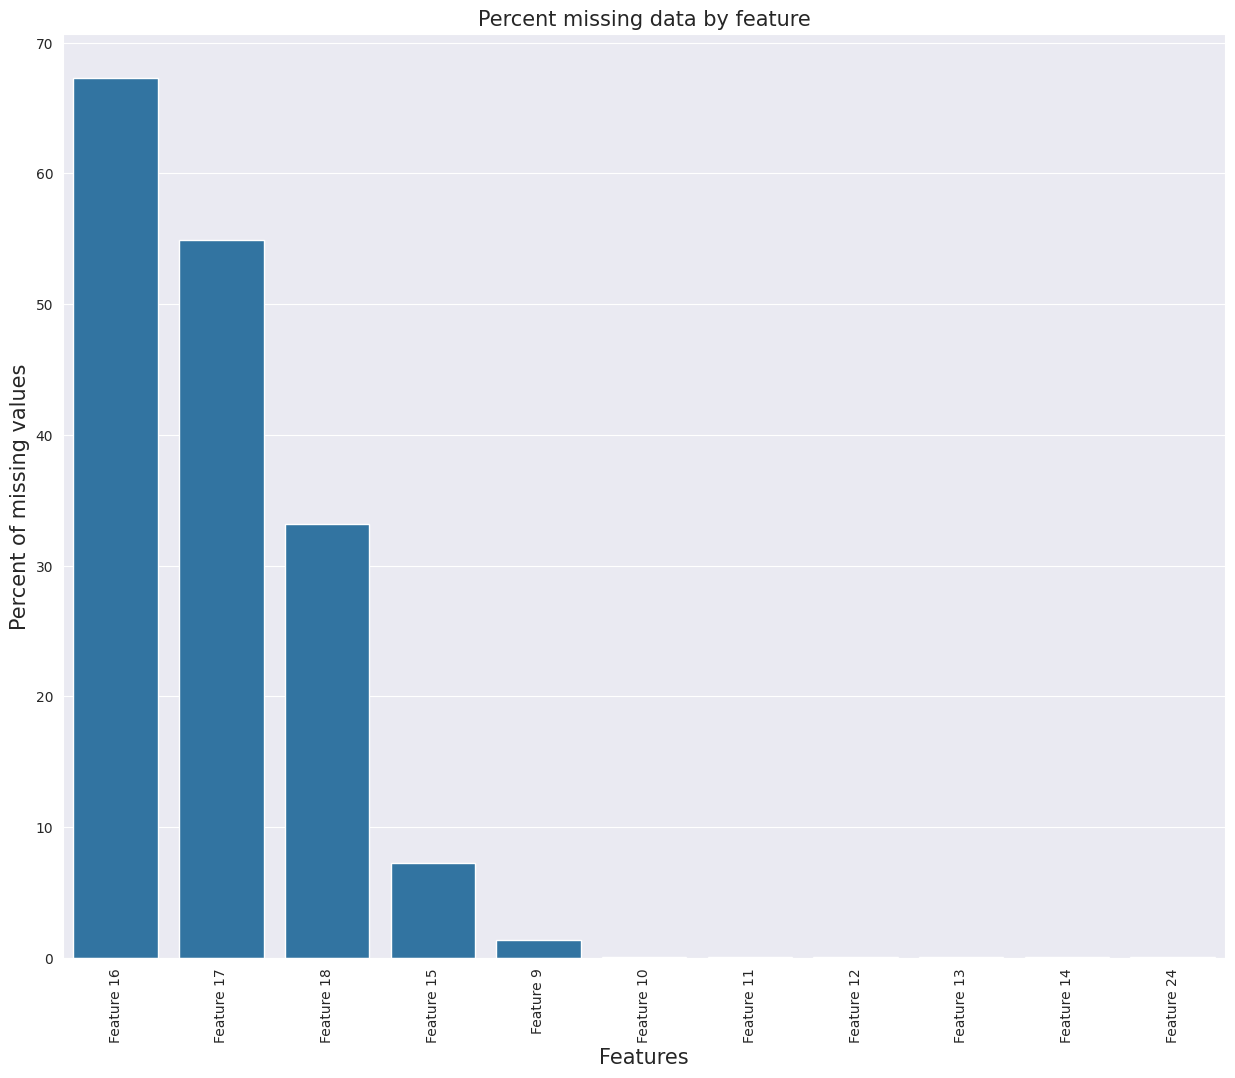

In [12]:
# Plotting these missing values percentages
f, ax = plt.subplots(figsize=(15, 12)) 
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<AxesSubplot:>

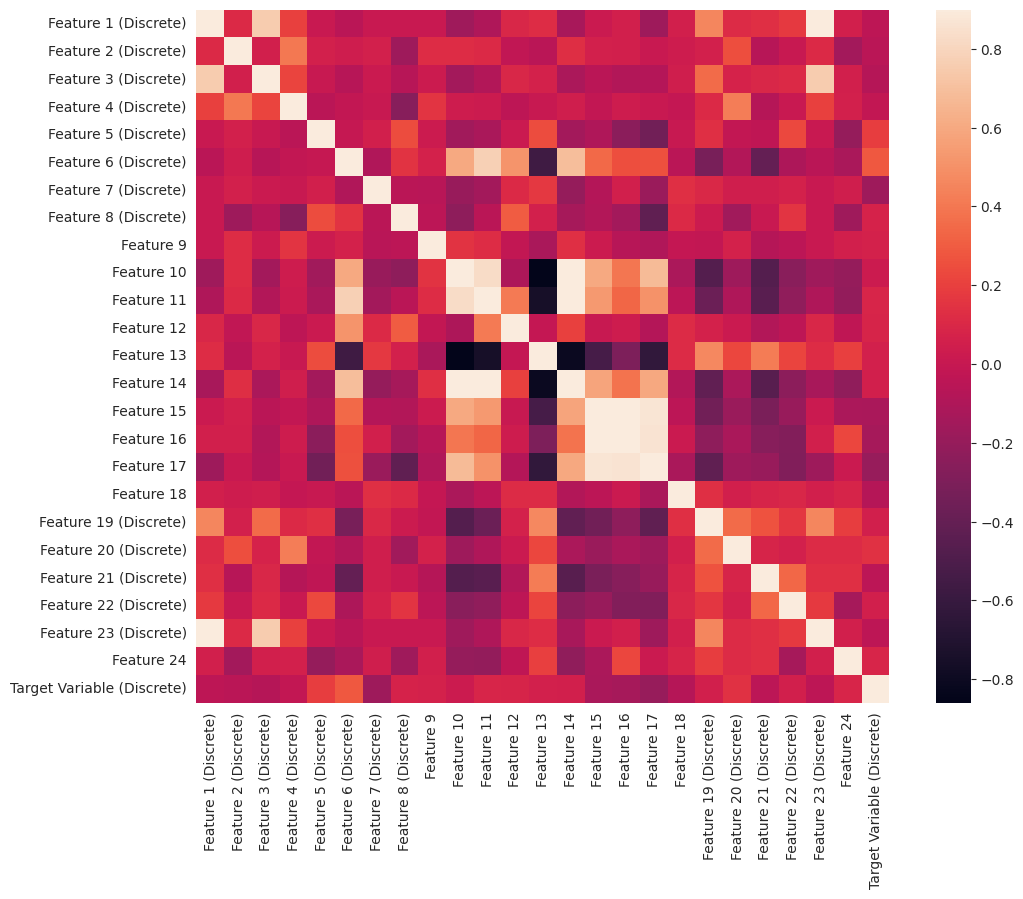

In [13]:


# Correlation map to see how features are correlated
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)



In [14]:
# Filling the 'nan' in Feature 15,16,17,18 with 0's 
objects=['15','16','17','18']
for i in objects:
    all_data['Feature '+i]=all_data['Feature '+i].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')

In [15]:


# Filling the 'nan' in Feature 14,24,13,12,11,10 with their respective means
features = [14,24,13,12,11,10]
for i in features:    
    all_data['Feature '+str(i)] = all_data['Feature '+str(i)].fillna(all_data['Feature '+str(i)].mode()[0])
all_data['Feature 9']=all_data['Feature 9'].fillna(all_data['Feature 9'].mean())



In [16]:


# Again check remaining missing values if any  
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100  # Detecting missing values  in all_data
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)  # Sorting the values
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})    # Creating a dataframe to put these missing values
missing_data.head()                                            # Printing the head



Empty DataFrame
Columns: [Missing Ratio]
Index: []

In [17]:


# Converting 5,6,7,8, features into category type
cat_features=['5','6','7','8']
for i in cat_features:
    all_data['Feature '+i+' (Discrete)']=all_data['Feature '+i+' (Discrete)'].astype('category')



In [19]:
print(all_data.dtypes)    # Printing the dtypes

Feature 1 (Discrete)        int64
Feature 2 (Discrete)        int64
Feature 3 (Discrete)        int64
Feature 4 (Discrete)        int64
Feature 5 (Discrete)     category
Feature 6 (Discrete)     category
Feature 7 (Discrete)     category
Feature 8 (Discrete)     category
Feature 9                 float64
Feature 10                float64
Feature 11                float64
Feature 12                float64
Feature 13                float64
Feature 14                float64
Feature 15                float64
Feature 16                float64
Feature 17                float64
Feature 18                float64
Feature 19 (Discrete)       int64
Feature 20 (Discrete)       int64
Feature 21 (Discrete)       int64
Feature 22 (Discrete)       int64
Feature 23 (Discrete)       int64
Feature 24                float64
dtype: object


In [20]:
def onehotencoding(feature,data):               # Function that does onehotencoding for the given column
    features=pd.get_dummies(data[feature], prefix=feature)
    return features

In [21]:


# Perfoming one hot encoding to 5,6,7,8 categorical features
Disc_5=onehotencoding("Feature 5 (Discrete)",all_data)
Disc_6=onehotencoding("Feature 6 (Discrete)",all_data)
Disc_7=onehotencoding("Feature 7 (Discrete)",all_data)
Disc_8=onehotencoding("Feature 8 (Discrete)",all_data)



In [22]:
# Dropping off the categorical column
features=["Feature 5 (Discrete)","Feature 6 (Discrete)","Feature 7 (Discrete)","Feature 8 (Discrete)"]
all_data.drop(features,axis=1,inplace=True)

In [23]:


# Concatinating the one hot encoded vectors
all_data = pd.concat([all_data, Disc_5], axis=1)   
all_data = pd.concat([all_data, Disc_6], axis=1)  
all_data = pd.concat([all_data, Disc_7], axis=1)  
all_data = pd.concat([all_data, Disc_8], axis=1)  



In [24]:
all_data.dtypes               # Printing the dtypes

Feature 1 (Discrete)        int64
Feature 2 (Discrete)        int64
Feature 3 (Discrete)        int64
Feature 4 (Discrete)        int64
Feature 9                 float64
                           ...   
Feature 8 (Discrete)_3      uint8
Feature 8 (Discrete)_4      uint8
Feature 8 (Discrete)_5      uint8
Feature 8 (Discrete)_6      uint8
Feature 8 (Discrete)_7      uint8
Length: 67, dtype: object

In [25]:


print(all_data.shape)        # Printing the shape of the final all_data



(1988, 67)


In [26]:


# Splitting train,test from all_data
train = all_data[:ntrain]
test = all_data[ntrain:]



In [27]:
print(train.shape)   # Printing the train shape

(994, 67)


In [28]:


print(test.shape)   # Printing the test shape



(994, 67)


In [30]:
# Importing models needed for training part
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
import xgboost as xgb
import lightgbm as lgb

In [31]:
# Validation function
n_folds = 5    # 5 folds validation

def score_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)    # Splitting train into 5 folds
    acc= cross_val_score(model, train.values, y_train, scoring="accuracy", cv = kf)  # Evaluating score by cross-validation
    return acc    # Returing the accuracies obtained

In [32]:
# GBoost classifier
GBoost = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, random_state =5)

In [33]:
# XGB classfier 
model_xgb = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)

In [34]:
# LGBM Classifier
model_lgb = lgb.LGBMClassifier(objective='multiclass',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [35]:
# Random forest
rf = RandomForestClassifier(random_state = 42)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']      # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]  # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]       # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]         # Minimum number of samples required at each leaf node
bootstrap = [True, False]            # Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()       # Number of trees in random forest
# Random search of parameters, using 3 fold cross validation, 
# Search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(train, y_train)       # Fit the random search model
print(rf_random.best_params_)       # Printing the params

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}


In [36]:
# Function for stacking models
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5): # Initialising parameters
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):     # Fit on the models
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        # Train base models then create out-of-fold predictions that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])  # Fitting
                y_pred = instance.predict(X[holdout_index])   # Predict
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)      # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        return self  
    
    def predict(self, X): # Do the predictions of all base models on the test data and use the averaged predictions as Meta-features for the final prediction which is done by the meta-model
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict_proba(meta_features)

In [37]:


# Giving xgb model as meta model
# Giving lgb,Gboost as base models as they are weak learners
stacked_averaged_models = StackingAveragedModels(base_models = (model_lgb, GBoost), meta_model = model_xgb)



In [38]:


score = score_cv(model_xgb)  # Finding the score of xgb model
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std())) # Printing the average of the 5 fold accuracies



Xgboost score: nan (nan)



In [ ]:


score = score_cv(model_lgb)  # Finding the score of lgb model
print("LGB score: {:.4f} ({:.4f})\n".format(score.mean(), score.std())) # Printing the average of the 5 fold accuracies



[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [ ]:
score = score_cv(GBoost)     # Finding the score of GBoost
print("LGB score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))  # Printing the average of the 5 fold accuracies

In [ ]:
score = score_cv(rf_random.best_estimator_)   # Finding the score of GBoost
print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))  # Printing the average of the 5 fold accuracies

In [ ]:
stacked_averaged_models.fit(train.values, y_train)  # Fitting the train values on the model
stacked_train_pred = stacked_averaged_models.predict(train.values) # Train predictions
stacked_pred = (stacked_averaged_models.predict(test.values))  # Predicting on test set and storing them
stacked_model = "stacked.pkl"  
with open(stacked_model, 'wb') as file:             # Saving the weights file
    pickle.dump(stacked_averaged_models, file)

In [ ]:
model_xgb.fit(train, y_train)                 # Fitting the train values on the model
xgb_train_pred = model_xgb.predict(train)     # Train predictions
xgb_pred =(model_xgb.predict_proba(test))     # Predicting on test set and storing them
xgb_model = "xgb.pkl"  
with open(xgb_model, 'wb') as file:           # Saving the weights file
    pickle.dump(model_xgb, file)

In [ ]:
model_lgb.fit(train, y_train)                 # Fitting the train values on the model
lgb_train_pred = model_lgb.predict(train)     # Train predictions
lgb_pred=model_lgb.predict_proba(test)        # Predicting on test set and storing them
lgb_model = "lgb.pkl"  
with open(lgb_model, 'wb') as file:           # Saving the weights file
    pickle.dump(model_lgb, file)

In [ ]:
GBoost.fit(train, y_train)                    # Fitting the train values on the model
GBoost_train_pred = GBoost.predict(train)     # Train predictions
GBoost_pred = GBoost.predict_proba(test.values) # Predicting on test set and storing them
Gboost_model= "Gboost.pkl"  
with open(Gboost_model, 'wb') as file:        # Saving the weights file
    pickle.dump(GBoost, file)


In [ ]:


rf_random.best_estimator_.fit(train, y_train)  # Fitting the train values on the model
rf_random.best_estimator_train_pred = rf_random.best_estimator_.predict(train)       # Train predictions
rf_random.best_estimator_pred = rf_random.best_estimator_.predict_proba(test.values) # Predicting on test set and storing them
rf_model= "rf.pkl"  
with open(rf_model, 'wb') as file:             # Saving the weights file
    pickle.dump(rf_random.best_estimator_, file)



In [ ]:
final_prob = np.multiply(rf_random.best_estimator_pred,0.5)+np.multiply(stacked_pred,0.3)+np.multiply(xgb_pred,0.1)+np.multiply(lgb_pred,0.05)+np.multiply(GBoost_pred,0.05)
lst=[]
for i in range(len(test)):
    lst.append([i+1,np.argmax(final_prob[i])])
ensemble = pd.DataFrame(lst)
ensemble.columns=["Id","Category"]
ensemble.to_csv('submission.csv',index=False)
print(ensemble.head())
